# SHAP Case Study


<b>Dataset:</b> https://archive.ics.uci.edu/ml/datasets/Abalone


In [ ]:
# !pip install xgboost

In [ ]:
# !pip install shap

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

import shap

shap.initjs()

# Dataset


In [2]:
# import dataset
data = pd.read_csv("abalone.csv")

print(len(data))
data.head()

4177


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0.5, 0, 'whole weight')

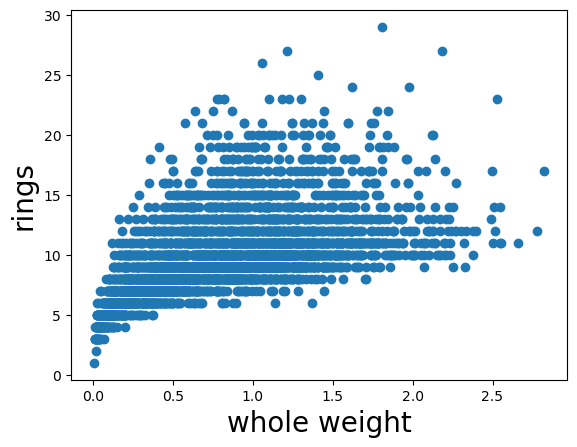

In [3]:
# plot 1: whole weight
plt.scatter(data["Whole weight"], data["Rings"])
plt.ylabel("rings", size=20)
plt.xlabel("whole weight", size=20)

<Axes: >

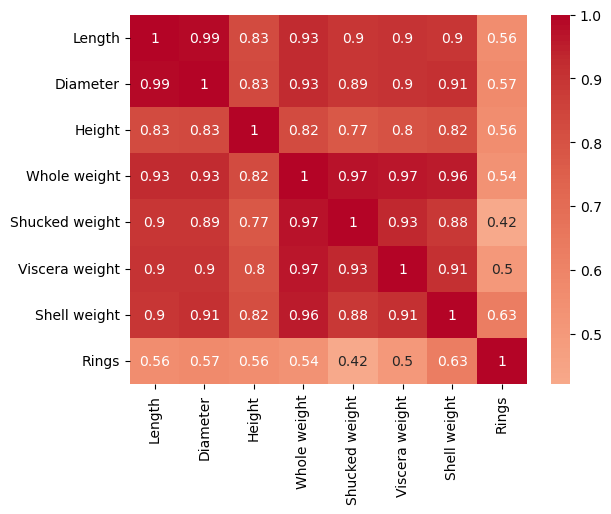

In [4]:
# plot 3: Correlation heatmap
cont = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2g")

# Feature Engineering


In [5]:
y = data["Rings"]
X = data[["Sex", "Length", "Height", "Shucked weight", "Viscera weight", "Shell weight"]]

In [6]:
# create dummy variables
X["Sex.M"] = [1 if s == "M" else 0 for s in X["Sex"]]
X["Sex.F"] = [1 if s == "F" else 0 for s in X["Sex"]]
X["Sex.I"] = [1 if s == "I" else 0 for s in X["Sex"]]
X = X.drop("Sex", axis=1)

X.head()

C:\Users\nvgra\AppData\Local\Temp\ipykernel_3112\1120002684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex.M"] = [1 if s == "M" else 0 for s in X["Sex"]]
C:\Users\nvgra\AppData\Local\Temp\ipykernel_3112\1120002684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex.F"] = [1 if s == "F" else 0 for s in X["Sex"]]


,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex.M,Sex.F,Sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


# Modelling


In [7]:
# train model
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Text(0.5, 0, 'Actual')

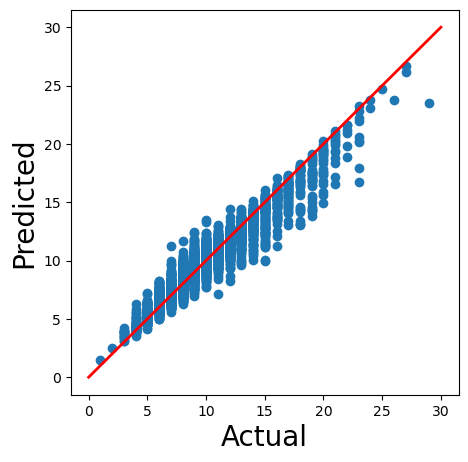

In [8]:
# get predictions
y_pred = model.predict(X)

# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0, 30], [0, 30], color="r", linestyle="-", linewidth=2)

plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

# 1) Standard SHAP values


In [9]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap_values = explainer(X[0:100])

In [10]:
np.shape(shap_values.values)

(100, 8)

## Waterfall plot


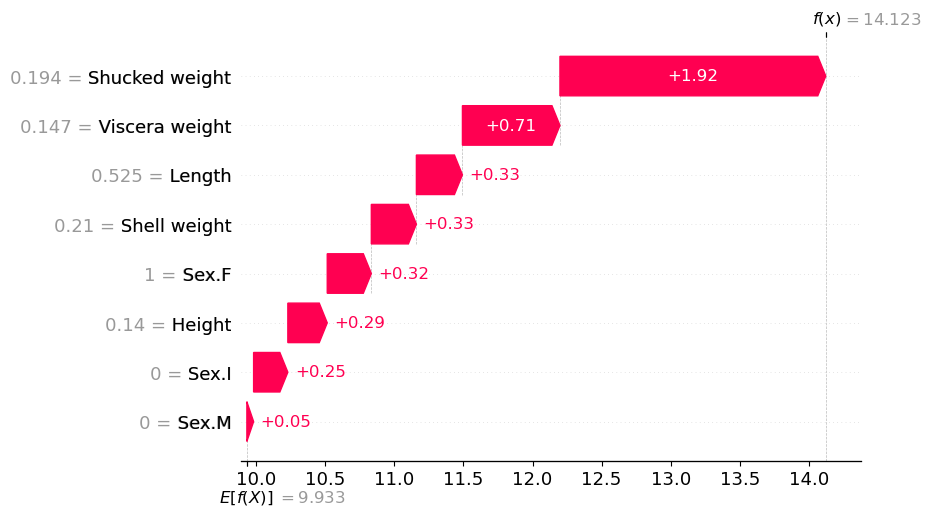

In [11]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[10])

---

Features pushing the prediction higher are shown in red

Features pushing the prediction lower are shown in blue

The magnitude of each bar represents the impact of that feature

Features are typically ordered by the magnitude of their impact

The plot helps you understand exactly why a model made a specific prediction

This visualization is especially valuable for explaining individual predictions to stakeholders or for debugging model behavior on specific cases.

---

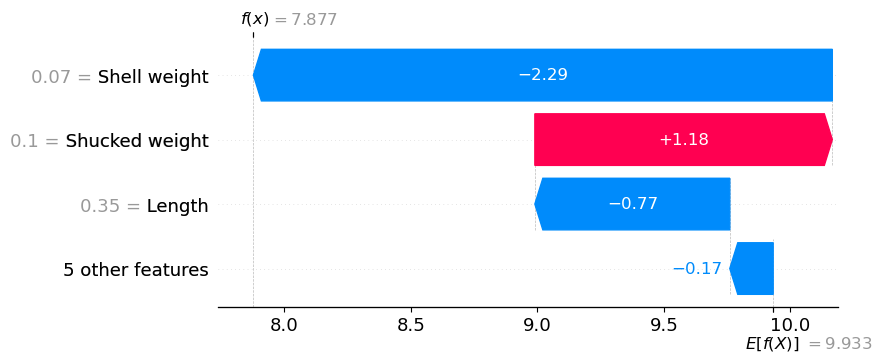

In [12]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[1], max_display=4)

# 2) SHAP aggregations


<b>Note:</b> from here on we only consider the continous target variable


## Force plot


In [ ]:
# force plot
shap.plots.force(shap_values[0])

Base Value: Shown in the middle

Feature Contributions: Displayed as forces pushing left (negative impact) or right (positive impact)

Final Prediction: The resulting value after all forces are applied

## Stacked force plot


In [ ]:
# stacked force plot
shap.plots.force(shap_values[0:100])

Overview Mode: Initially shows an aggregated view of all instances

Individual Exploration: Allows clicking on specific regions to zoom in on individual predictions

Pattern Recognition: Helps identify clusters or patterns in how features affect predictions across your dataset

## Absolute Mean SHAP


In [ ]:
# mean SHAP
shap.plots.bar(shap_values)

## Beeswarm plot


In [ ]:
# beeswarm plot
shap.plots.beeswarm(shap_values)

## Violin plot


In [ ]:
# violin plot
shap.plots.violin(shap_values)